In [1]:
import tensorflow as tf
import numpy as np
import os
import skimage

In [3]:
path = "croppedImages/"
num = 24686 #24 686 in folder

dataset = []

for img in range(1,num + 1):  
    img_array = skimage.util.img_as_float32(skimage.io.imread(path + str(img) + ".png"))
    dataset.append(img_array)
      

len(dataset)

24686

In [4]:
import random

random.shuffle(dataset)
dataset = np.array(dataset)

print(dataset.shape)

(24686, 32, 32, 3)


In [11]:
#Convolutional autoencoder with dense layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Reshape, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import TensorBoard
import time

#NAME = 'Conv-AE-2x2-denseEnd-32x32' + str(time.time())
NAME = 'Conv-AE-8x8-Conv-end-sigmoid' + str(time.time())
tensorboard = TensorBoard(log_dir='logs/' + NAME)


model = Sequential()

model.add(Conv2D(3,(3,3), input_shape = dataset.shape[1:], padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##16x16

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##8x8

# model.add(Conv2D(3,(3,3),  padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2))) ##4x4

# model.add(Conv2D(3,(3,3),  padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2))) ##2x2

# model.add(Conv2D(3,(3,3),  padding='same'))
# model.add(UpSampling2D((2,2))) #4x4

# model.add(Conv2D(3,(3,3),  padding='same'))
# model.add(UpSampling2D((2,2))) #8x8

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(UpSampling2D((2,2))) #16x16

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(UpSampling2D((2,2))) #32x32

model.add(Conv2D(16,(3,3), padding='same'))
model.add(Conv2D(3,(3,3), padding='same'))
model.add(Activation("sigmoid"))#32x32 output

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(dataset,dataset,batch_size=64, verbose=1,epochs=200, validation_split=0.01, callbacks=[tensorboard])

Train on 24439 samples, validate on 247 samples
Epoch 1/200
24439/24439 [==============================] - ETA: 0s - loss: 0.023 - 3s 124us/sample - loss: 0.0239 - val_loss: 0.0166
Epoch 2/200
24439/24439 [==============================] - 3s 108us/sample - loss: 0.0155 - val_loss: 0.0150
Epoch 3/200
24439/24439 [==============================] - 3s 111us/sample - loss: 0.0139 - val_loss: 0.0130
Epoch 4/200
24439/24439 [==============================] - 3s 106us/sample - loss: 0.0127 - val_loss: 0.0123
Epoch 5/200
24439/24439 [==============================] - 3s 108us/sample - loss: 0.0121 - val_loss: 0.0116
Epoch 6/200
24439/24439 [==============================] - 3s 109us/sample - loss: 0.0115 - val_loss: 0.0111
Epoch 7/200
24439/24439 [==============================] - 3s 118us/sample - loss: 0.0112 - val_loss: 0.0109
Epoch 8/200
24439/24439 [==============================] - 3s 109us/sample - loss: 0.0110 - val_loss: 0.0107
Epoch 9/200
24439/24439 [==============================]

Epoch 75/200
24439/24439 [==============================] - 3s 106us/sample - loss: 0.0094 - val_loss: 0.0091
Epoch 76/200
24439/24439 [==============================] - 3s 106us/sample - loss: 0.0094 - val_loss: 0.0091
Epoch 77/200
24439/24439 [==============================] - 3s 106us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 78/200
24439/24439 [==============================] - 3s 105us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 79/200
24439/24439 [==============================] - 3s 105us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 80/200
24439/24439 [==============================] - 3s 106us/sample - loss: 0.0093 - val_loss: 0.0092
Epoch 81/200
24439/24439 [==============================] - 3s 107us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 82/200
24439/24439 [==============================] - 3s 106us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 83/200
24439/24439 [==============================] - 3s 107us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 84/2

24439/24439 [==============================] - 3s 117us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 150/200
24439/24439 [==============================] - 3s 114us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 151/200
24439/24439 [==============================] - 3s 112us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 152/200
24439/24439 [==============================] - 3s 114us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 153/200
24439/24439 [==============================] - 3s 109us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 154/200
24439/24439 [==============================] - 3s 115us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 155/200
24439/24439 [==============================] - 3s 116us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 156/200
24439/24439 [==============================] - 3s 110us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 157/200
24439/24439 [==============================] - 3s 107us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 158/200
2

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 3)         84        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 3)         84        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 3)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 3)           84        
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 3)         84        
__________

In [13]:
model.save('models/' + NAME + '.model')

Score neural network


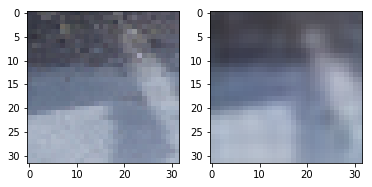

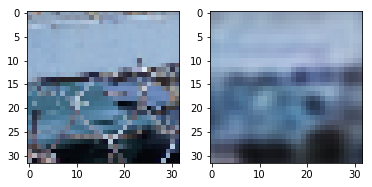

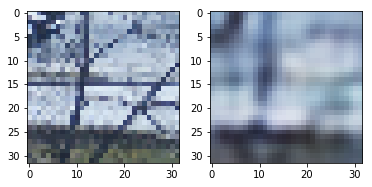

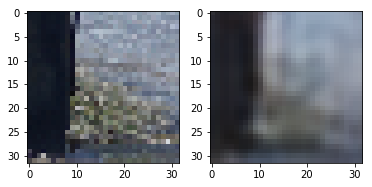

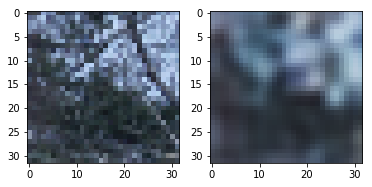

In [14]:
from PIL import Image

NUM = 5

print("Score neural network")
pred = model.predict(dataset[0:NUM])

cols,rows = 32,32
for i in range(NUM):
    predicted = pred[i].reshape(rows,cols,3)
    original = dataset[i].reshape(rows,cols,3)   
    
    skimage.io.imshow_collection([original,predicted])
    skimage.io.show()

raw_images/DSC09168.JPG


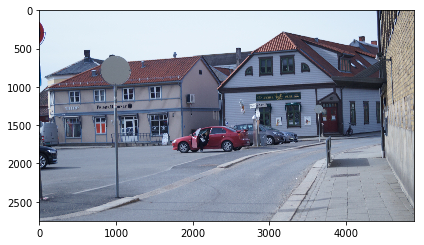

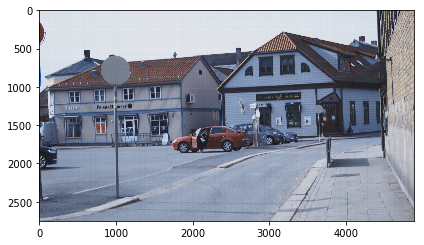

In [15]:
from skimage import io
import math
import random

cropWidth, cropHeight = (32,32)


io.use_plugin('matplotlib')
# nameOfImage = "raw_images/DSC0" + str(random.randint(9003,9481)) +".JPG"
nameOfImage = "raw_images/DSC09168.JPG"
print(nameOfImage)
im = skimage.util.img_as_float32(io.imread(nameOfImage))
#im = skimage.util.img_as_float32(io.imread("gruppe.jpg"))
height, width, debth = im.shape

numWidth, numHeight = math.floor(width / cropWidth) , math.floor(height / cropHeight)
croppedIM = im[:numHeight*cropHeight,:numWidth*cropWidth,:]

io.imshow(croppedIM)
io.show()

# strides = np.lib.stride_tricks.as_strided(croppedIM, shape=(numWidth*numHeight,32, 32, 3))
# print(strides.shape)

reshaped = im[:numHeight*cropHeight,:numWidth*cropWidth,:].reshape((numWidth*numHeight,32,32,3))
predictions = model.predict(reshaped)

firstRow = True

for x in range(numHeight):
    firstCol = True
    for y in range(numWidth):
        cropped = im[x*cropWidth:(x+1)*cropWidth,y*cropHeight:(y+1)*cropHeight]
        
        croppedArray = [cropped]
        croppedArray = np.array(croppedArray)
        croppedArray = model.predict(croppedArray)
        
        cropped = croppedArray[0].reshape(cropWidth,cropHeight,3)
        
        if(firstCol):
            row = cropped
            firstCol = False
        else:
            row = np.concatenate((row,cropped),axis=1)
    if(firstRow):
        out = row
        firstRow = False
    else:
        out = np.concatenate((out,row),axis=0)
io.imshow(out)
io.show()
io.imsave('encoded-decoded-2x2.png',out)